# Course: COMP 671D, Machine Learning
# Homework Assignment 1
# Name: Samuel Eure

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import random
%matplotlib inline
plt.style.use("seaborn-white")

## Perceptron 1

## 1a)

#### Do they necessarily obtain the same decision boundary?
Regarding the first part of this question, if a dataset is shuffled and the perceptron algorithm is run on it, the perceptron algorithm may $\textbf{not}$ arrive at the same hyperplane when run on the original order of the dataset. For example, consider the dataset
$$
X = \begin{bmatrix} 1 && 1 \\ 1 && -2 \end{bmatrix},  Y = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$
Since the datapoints comprising this dataset have opposite labels and have a negative dot product, the perceptron algorithm will alwasy stop after only one iteration of correcting the weight vector $\vec w$, which will now define a hyperplane either orthogonal to $\vec x_a = \begin{bmatrix}1 && 1 \end{bmatrix}$ or $\vec x_b = \begin{bmatrix}1 && -2 \end{bmatrix}$. Since the dot product of the two data point vectors is negative, this orthogonal hyperplane will separate the two points. This is demonstrated in the following two snippets of code below, where the perceptron algorithm is run on this example and a solution is found:

0


Text(0,0.5,'X2')

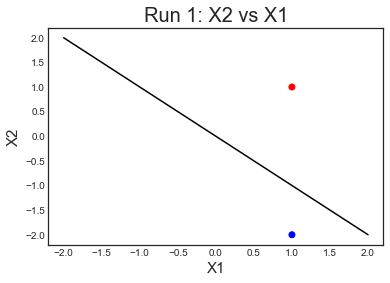

In [93]:
A = np.array([[1,1],[1,-2]])
B = np.array([1,-1])
colorMap = {-1:"blue", 1:'red'}
W = np.array([0,0]) 
good = 0
while good < len(A):
    good = 0
    for i in range(len(A)):
        x_i = A[i]
        y_i = B[i]
        if np.sign(np.matmul(W,x_i))*y_i > 0:
            good = good +1
            continue;
        else:
            print(good)
            good = 0
            W = W + y_i*x_i
colors = [colorMap[b] for b in B]
plt.scatter(A[:,0], A[:,1], c = colors)
plt.plot([-2,2], [2*W[0]/W[1],-2*W[0]/W[1]], color = 'black')
plt.title("Run 1: X2 vs X1", fontsize = 20)
plt.xlabel("X1", fontsize = 15)
plt.ylabel("X2", fontsize = 15)

Above, the decision boundary found is defined by the hyperplane $x_2 = -x_1$

0


Text(0,0.5,'X2')

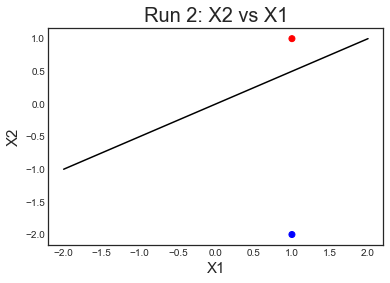

In [94]:
index = [1,0]
W = np.array([0,0]) 
A = A[index,:]
B = B[index]
good = 0
while good < len(index):
    good = 0
    for i in range(len(A)):
        x_i = A[i]
        y_i = B[i]
        if np.sign(np.matmul(W,x_i))*y_i > 0:
            good = good +1
            continue;
        else:
            print(good)
            good = 0
            W = W + y_i*x_i
colors = [colorMap[b] for b in B]
plt.scatter(A[:,0], A[:,1], c = colors)
plt.plot([-2,2], [2*W[0]/W[1],-2*W[0]/W[1]], color = 'black')
plt.title("Run 2: X2 vs X1", fontsize = 20)
plt.xlabel("X1", fontsize = 15)
plt.ylabel("X2", fontsize = 15)

Above, the decision boundary was determined to be the hyperplane $x_2 = \frac{1}{2}x_1$.  This example clearly demonstrates that the overall decision boundary may depend on the order in which data is fed into the algorithm. In this case, the order matters since the decision boundary is simply orthogonal to the vector pointing to the data point which is first observed, and since $\vec x_a$ and $\vec x_b$ have a negative dot product, these hyperplanes $\textbf{cannot}$ be the same boundary.

#### Do they necesarily converge at the same rate?
As for the second question of whether or not the perceptron algorithm will converge at the same rate, the answer to this question is also $\textbf{no}$, they may not. They may converge at different rates. For example, if a third datapoint is added to the dataset above resulting in $$
X = \begin{bmatrix} 1 && 1 \\ 1 && -2 \\ -1 && 0 \end{bmatrix},  Y = \begin{bmatrix} 1 \\ -1 \\ 1 \end{bmatrix}
$$
Then if the algorithm begins with the point $x_b = \begin{bmatrix}1 && -2 \end{bmatrix}$, it will create a $w^{(1)} = [-1, 2 ]$, which will correctly classify the remaining two points, so the algorithm will only require one update of $w$, which mean it will only make two more comparisons with the other datapoints to ensure they are categorized correctly, and given that no changes to the weight vector will be made during this time, the algorithm may stop since it is already known that the first datapoint is correctly categorized. However, if the algorithm begins with $x_a = \begin{bmatrix}1 && 1\end{bmatrix}$, it will create a $w^{(1)} = [1,1]$, which will incorrectly classify $x_c = \begin{bmatrix}-1 && 0\end{bmatrix}$, and thus the algorithm will at least undergo one more comparison of $y_i w_i^T x_i$ to $0$ and update the value of $w$. Next, it will then continue to compare $y_i w_i^T x_i$ to zero at least two more additional times to ensure that $x_1$ is still classified correctly and all remaining points are categorized correctly. Thus, the rate of convergence can change when you shuffle the data.

## 1b)

### Simple case with p = 2

Using the dataset $D = \begin{bmatrix}X_1 && X_2 && Y \\1&&1&&0\\1&&0&&1\\0&&1&&1\\0&&0&&0 \end{bmatrix}$, suppose $\exists \vec w$ a weight vector and $\exists b$ a bias term which, together, are able to define a hyperplane which linearly separates the datapoints. Then by definition of the XOR function, the following constraints would need to be met:
$$
w_1 + w_2 + b <0 
$$
$$
w_1 + b > 0
$$
$$
w_2 + b > 0
$$
$$
b < 0 
$$

Note that the condition $\big(b < 0 \big) \Longrightarrow \big(w_1 > -b = |b| = -b < w_2 \big) \Longrightarrow w_1$ \& $w_2$ are positive and each have absolute value greater than $b$. However, $\big(w_1 + w_2 + b <0  \big)$ implies that $w_1 + w_2 < -b =|b|$, which contradicts the previous condition. Thus, there cannot exist such a weight vector $\vec w$ and bias term $b$ which define a hyperplane which separates the dataset.

### Higher dimentional parity function with p $\geq 2$

#### Proposition: The parity function for length n inputs is also not linearly separable for any p ≥ 2 dimensions

I will use mathematical induction to prove this claim. 

$\big(I\big)$ I have already proved the $p=2$ case above.

$\big(II\big)$ Assume the sample space of values generated from the parity function of dimention $p-1$ is not linearly separable where $p >1$, call this sample space $\Omega_{p-1}$, and and consider the parity function over $\Omega_{p}$. Suppose $\exists w_{p}$ a weight vector and $\exists b_{p}$ a bias term such that the function $f_p(\vec x_{p}; \vec w_{p},b_p) = \vec w^T \vec x_p +b$ can be used as a parity function of this dimention to linearly separate data points, such that $\vec x_p \in \Omega_p$, $\vec w_p \in \mathbb{R}^p$, and $b_p \in \mathbb{R}$. Then, it should be that $f_p$ is able to correctly label all datapoints laying in a subset of the sample space $\Omega_p$. For example, if $\vec x_p = \begin{bmatrix}x_{p,1} \\ \vdots \\ x_{p,p-1} \\ x_{p,p}\end{bmatrix}$ and $\vec w_p = \begin{bmatrix}w_{p,1} \\ \vdots \\ w_{p,p-1} \\ w_{p,p}\end{bmatrix}$, then $f_p$ should be able to correctly label all data points laying in the subset 
$\hat \Omega_p = \{\vec x_p \in \Omega_p | x_{p,p} = 0 \}$, which implies this region is linearly seperable by the parity function, which implies $\forall \vec \chi_p \in \hat \Omega_p$,
$$
\hspace{10pt} \vec w_p^T \vec \chi_p + b_p = \chi_{p,1}w_{p,1} + \dots + \chi_{p,p-1}w_{p,p-1} + \chi_{p,p}w_{p,p} + b_p $$
$$= \chi_{p,1}w_{p,1} + \dots + \chi_{p,p-1}w_{p,p-1} + b_p$$
will lay on the correct side of the decision boundary defined by $\vec w_p$ and $b_p$. However, by assumption this set of points is not linearly seperable since the parity function of $p-1$ dimentions is not linearly seperable. Thus, if the parity function of $p-1$ dimentions is not linearly seperable across it's sample space for $p>1$, then the parity function of $p$ dimentions is not linearly seperable across it's sample space. 

Given $\big(I\big)$ and $\big(II\big)$, by the principle of mathematical induction, the sample space of the parity function of $p\geq 2$ dimentions is not linearly seperable.

## 1c)

By introducing an $\big( X_1$ AND $X_2\big)$ term, the dataset becomes 
$X = \begin{bmatrix}1&&1&&1\\1&&0&&0\\0&&1&&0\\0&&0&&0\end{bmatrix}$. By introduing a constant term to the dataset of $1$ (which will implicitly include a bias term) and using a weight vector of $\vec w = \begin{bmatrix} w_1 \\w_2\\w_3\\b\end{bmatrix}$, the perceptron algorithm can easily be run to obtain a weight vector which linearly separates the variables. This is performed below:

In [56]:
X = np.array([[1,1,1,1],[1,0,0,1],[0,1,0,1],[0,0,0,1]])
Y = np.array([-1,1,1,-1])
colorMap = {-1:"blue", 1:'red'}
W = np.array([0,0,0,1]) 
good = 0
while good < len(X):
    good = 0
    for i in range(len(Y)):
        x_i = X[i]
        y_i = Y[i]
        if np.sign(np.matmul(W,x_i))*y_i > 0:
            good = good +1
            continue;
        else:
            good = 0
            W = W + y_i*x_i
print("W = ", W[:-1], ", b=",W[-1])
print("Predictions: ",np.matmul(X,W))
print("Data labels: ",Y)

W =  [ 2  2 -4] , b= -1
Predictions:  [-1  1  1 -1]
Data labels:  [-1  1  1 -1]


Thus, a weight vector of $\vec w = \begin{bmatrix} 2\\2\\-4\end{bmatrix}$ and a bias term of $b = -1$ can be used to separate the data points.

## Perceptron 2

### 2a)

The variables "Age" and "TumorSize" are provided as interval values. First, I will convert these intervals (assuming they are open intervals) into their lower bounds so that I can represent the pairs of data points as a scatterplot.

In [95]:
bcData = pd.read_csv("breast-cancer_cleaned.csv")
bcData["ClassChange"] = (bcData.Class == "recurrence-events")*2 -1  
#making these binary variables 
bcData["AgeChange"] = [int(x.split("-")[0]) for x in bcData.Age.tolist()] 
#Taking the lower bound of these intervals 
bcData["TumorSizeChange"] = [int(x.split("-")[0])
                    for x in bcData.TumorSize.tolist()]  
#Taking the lower bound of these intervals 
bcData.head()

,Class,Age,TumorSize,ClassChange,AgeChange,TumorSizeChange
0,recurrence-events,30-39,0-4,1,30,0
1,recurrence-events,30-39,15-19,1,30,15
2,recurrence-events,30-39,30-34,1,30,30
3,recurrence-events,30-39,25-29,1,30,25
4,recurrence-events,30-39,30-34,1,30,30


 I will now produce a scatterplot 'Age' and 'TumorSize'. In this plot, blue labels will indicate recurrence-events and red labels will indicate no-recurrence-events. The sizes of the points do not represent any difference between the sets of points are are explicitly used to observe an overlap between two sets of points.
 
The two variables $\textbf{are linearly seperable}$ by a vertical line. The black dotted line on the plot belows presents a potential hyperplane separating these variables. 

(-5, 55)

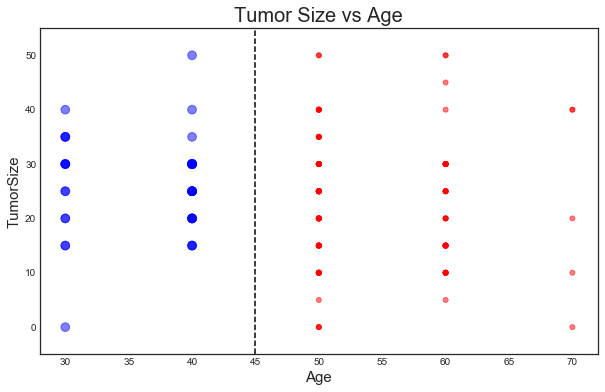

In [97]:
fig = plt.figure(figsize = (10,6))
A = {1:'blue', -1:'red'}
plt.scatter(bcData.AgeChange,bcData.TumorSizeChange, 
            c = [A[a] for a in bcData.ClassChange],
            s = (bcData.ClassChange+2)*25, 
            alpha = .5, label = None)
plt.xlabel("Age",fontsize = 15)
plt.ylabel("TumorSize",fontsize =15)
plt.title("Tumor Size vs Age",fontsize = 20)
plt.vlines(45,ymin = -5, ymax = 55, linestyles ='--', 
           colors = 'black', label = 'Division Line')
plt.ylim([-5,55])

As shown above, the two classes of points are clearly linearlly seperable, as evidenced by the ability to draw a vertical decision boundary at the Age = 45  mark which divides the two classes. 

## 2b & 2c)

First, I will do some data cleaning and write some helpful functions.

In [142]:
X = bcData[["AgeChange",'TumorSizeChange']]
#adding a bias term
X["Bias"] = 1 
X = np.array(X)
Y = np.array(bcData["ClassChange"])

def calcL2Norm(some_list):
    return(np.sqrt(sum([s*s for s in some_list])))

def shuffleXY(X,Y):
    n = len(Y) 
    indexes = list(range(n))
    random.shuffle(indexes) #Shuffling the indexes of the data
    X = X[indexes]
    Y = Y[indexes]
    return(X,Y)  

def calcAccuracy(X,Y,w):
    hits = np.sign(np.matmul(X,w)) == Y
    return(sum(hits)/len(Y))

/Users/euresa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Please excuse this weird error message above. It's simply informing me that it would prefer I upgrade my version of python or would prefer I index an array by a different method.

Next, I will divide the data into a training and test set, and run the perceptron algorithm.

In [99]:
random.seed(1)
X,Y = shuffleXY(X,Y)
#Dividing data into two sets
train   = int(len(Y)*0.7)
X_train = X[0:train,:]
Y_train = Y[0:train]
X_test  = X[train:,:]
Y_test  = Y[train:]

#initalize w
w = np.array([0,0,0])  #An extra dimention added for the intercept.
passed = 0
#Train model: The while loop will execute until
#              all of the points have been correctly labeled.
accuracyUpdates  = [0]
accuracyUpdatesT = [0]
while passed < len(X_train):
    passed = 0
    for i in range(len(X_train)):
        x_i = X_train[i]
        y_i = Y_train[i]
        if np.sign(np.matmul(w,x_i))*y_i > 0:
            passed += 1
            continue;
        else:
            w = w + y_i*x_i 
            accuracyUpdates.append(calcAccuracy(X_train, Y_train, w))
            accuracyUpdatesT.append(calcAccuracy(X_test, Y_test, w))

print("Final w vector: ",w)

Final w vector:  [-100    0 4008]


$$
\text{I obtained } \vec{w} = \begin{bmatrix} w_{Age} \\w_{TumorSize}\\w_{intercept} \end{bmatrix} 
= \begin{bmatrix}-100 \\0\\4008 \end{bmatrix} \text{ as my weight vector.} $$

$$
\text{ If } \vec x = \begin{bmatrix} Age \\ TumorSize \\ 1 \end{bmatrix} 
\text{, this corresponds to an equation of }
$$

$$
\hat y_i = w \cdot x_i = -100Age +4008
$$

$$
\text{By setting } \hat y_i \text{ to zero (which corresponds to the boundary of decision making)
      we see that } $$
      
$$Age = 40.08 \text{ is a decision boundary!!!}
$$

(-5, 55)

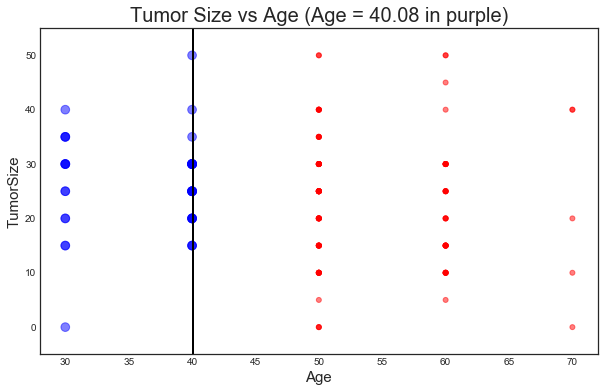

In [116]:
fig = plt.figure(figsize = (10,6))
plt.scatter(bcData.AgeChange,bcData.TumorSizeChange, 
            c = [A[a] for a in bcData.ClassChange],
            s = (bcData.ClassChange+2)*25, 
            alpha = .5, linewidth = 1)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("TumorSize",fontsize = 15)
plt.title("Tumor Size vs Age (Age = 40.08 in purple)",fontsize = 20)
plt.vlines(40.08, ymin = -5, ymax = 55, colors ='black',
           linewidth = 2,label = 'Age = 40.8')
plt.ylim([-5, 55])

Although it may look as though the black line intercects the blue data points, this does not happen since all age values are integers and if the data points had an "Age" value of 41, it would be clearly to the right of the decision boundary.

## 2d)

First, I will reshuffle the training data set.

In [111]:
X_train2,Y_train2 = shuffleXY(X_train,Y_train)

Now, I will reimplement the perceptron algorithm using this order of the training set.

In [114]:
#initalize w
w2 = np.array([0,0,0])  #An extra dimention added for the intercept.
passed = 0
#Train model: The while loop will execute until
#              all of the points have been correctly labeled.
accuracyUpdates2  = [0]
accuracyUpdatesT2 = [0]
while passed < len(X_train2):
    passed = 0
    for i in range(len(X_train2)):
        x_i = X_train2[i]
        y_i = Y_train2[i]
        if np.sign(np.matmul(w2,x_i))*y_i > 0:
            passed += 1
            continue;
        else:
            w2 = w2 + y_i*x_i 
            accuracyUpdates2.append(calcAccuracy(X_train2, Y_train2, w2))
            accuracyUpdatesT2.append(calcAccuracy(X_test, Y_test, w2))

print("Final w vector: w =",w2)

Final w vector: w = [ -80   15 3079]


Using this order of the training set, I obtained
$$\vec{w} = \begin{bmatrix}-80 \\15\\3079 \end{bmatrix} $$
as a new weight vector. This results in an equation of
$$TumorCount = \frac{16}{3}Age - \frac{3079}{15}
$$

Below, the purple line represents the first decision boundary of $Age = 40.08$, and the black line represents the second boundary of $TumorCount = \frac{16}{3}Age - \frac{3079}{15}$

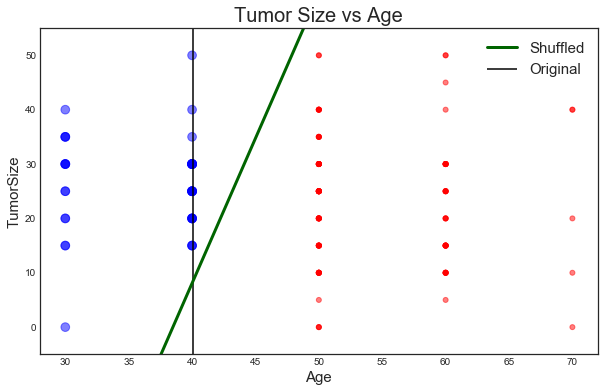

In [117]:
fig = plt.figure(figsize = (10,6))
xSpace = np.linspace(30,70)
ySpace = (16/3)*xSpace - (3079)/15
plt.scatter(bcData.AgeChange,bcData.TumorSizeChange, 
            c = [A[a] for a in bcData.ClassChange],
            s = (bcData.ClassChange+2)*25, 
            alpha = .5, label = None)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("TumorSize", fontsize = 15)
plt.title("Tumor Size vs Age", fontsize = 20)
plt.vlines(40.08, ymin = -5, ymax = 55, colors ='black', label = 'Original')
plt.ylim([-5, 55])
plt.plot(xSpace, ySpace, c='darkgreen', label = "Shuffled", linewidth = 3)
plt.legend(fontsize = 15)


As shown above, the two boundaries are different from each other. This makes sense since the order that the data is iterated through influences the final hyperplane through the data, as demonstrated in problem 1a above. The intuition behind this is that changes to the hyperplane are made on a data point to data point basis. Thus if a data point is the first to be observed, it most certainly will be a "mistake" (since the model is untrained in the beginning) and influence the hypterplane, whereas a data point seen near the end of the algorithm has a lower probability of being labeled as a 'mistake' (since the model has been trained).

## 2e

## Training Data Convergence

In [119]:
print("Updates from first dataset:", len(accuracyUpdates),
      "\n","Updates from second dataset:", len(accuracyUpdates2))
print("Difference in rates of convergence is a factor of:",
      len(accuracyUpdates)/len(accuracyUpdates2))


Updates from first dataset: 27449 
 Updates from second dataset: 19574
Difference in rates of convergence is a factor of: 1.4023194032900788


First, I'll note that training the perceptron using the original dataset (original as in it has not been shuffled a second time) needed roughtly $1.4$ times as many updates as the second, shuffled dataset. Thus, the overall convergence of $w^{(1)}$ was slower than the overall convergence of $w^{(2)}$. As discussed in question 1a, this should not be surprising since it has already been demonstrated that the order in which data is fead into the perceptron algorithm influences the rate of convergence and the overall answer of the algorithm.

### Plotting the training set and test set progression of the "before shuffling" data set.
First, I will plot the current accuracy for the training set and test set of the first data set, where the for the current value of $w^{(t)}$, the accuracy of the entire training set and the entire test set were calculated. To make the plot more legible, the sequence of datapoints has been "thinned" to only show every $30^{th}$ value.

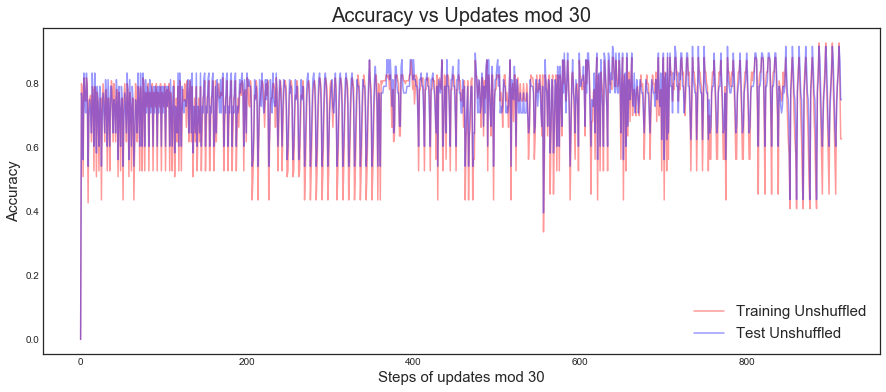

In [133]:
fig = plt.figure(figsize=(15,6))
plt.plot(accuracyUpdates[ ::30], alpha = .4, color = 'red', 
         label = 'Training Unshuffled')
plt.plot(accuracyUpdatesT[::30], alpha = .4, color = 'blue', 
         label = 'Test Unshuffled')
plt.xlabel('Steps of updates mod 30', fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.title("Accuracy vs Updates mod 30", fontsize = 20)
plt.legend(loc = 'lower right', fontsize = 15)

#### Comments on Training vs Test for unshuffled data set:  
As shown above, it appears that the training and test data sets obtained roughly the same rate of convergence and tended to mirror each other throught the training phase, with the training set error (surprisingly) being lower than the test set error in some cases. This is probably a result of the size of the training set and the same of the distribution of data points.

### Plotting the accuracy of the training set and test set from the shuffled data set.

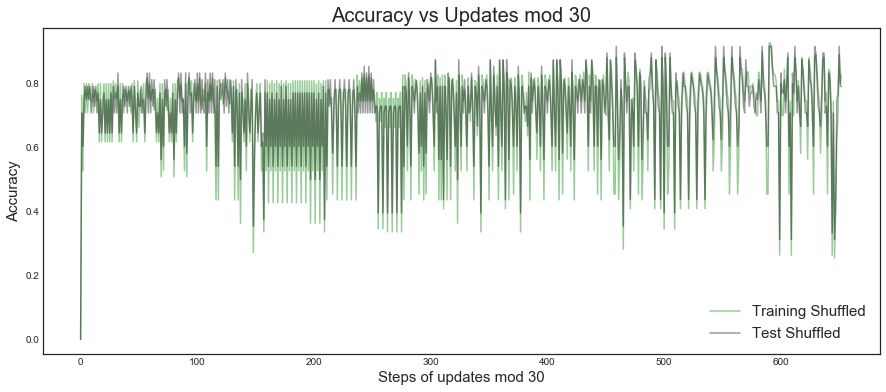

In [134]:
fig = plt.figure(figsize=(15,6))
plt.plot(accuracyUpdates2[::30], alpha = .4, color = 'green', 
         label = 'Training Shuffled')
plt.plot(accuracyUpdatesT2[::30], alpha = .4, color = 'black',
         label = 'Test Shuffled')
plt.xlabel('Steps of updates mod 30', fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.title("Accuracy vs Updates mod 30", fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 15)

#### Commentson the Training and Test set accuracy convergence of the shuffled data set.
The interpretation of this plot is similar to the one above, however the discrepency between the training and test set acccuracies is even smaller in this instance. Also, note that this run took considerably fewer updates of $\vec w$ until a solution was found. 

### Comparing training set accuracy convergence from each run.

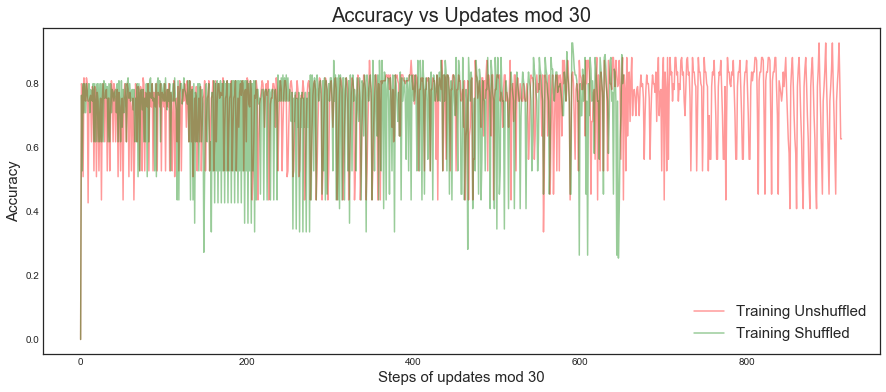

In [137]:
fig = plt.figure(figsize=(15,6))
plt.plot(accuracyUpdates[::30], alpha = .4, color = 'red', 
         label = 'Training Unshuffled')
plt.plot(accuracyUpdates2[::30], alpha = .4, color = 'green', 
         label = 'Training Shuffled')
plt.xlabel('Steps of updates mod 30', fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.title("Accuracy vs Updates mod 30", fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 15)

#### Comments on the convergences of the individual training sets
As shown above, the two training sets followed a similar path to convergence, however the shuffled training set suddendly "gets lucky" and stops at around the $630$ mark above (which corresponds to the $19574$ mark when factoring in the fact that only every $30^{th}$ point is plotted. Thus, the shuffled training set arrived at a solution significantly faster than the original, unshuffled training set. As alluded to, this was probably due to chance.

### Comparing test set accuracy convergence from each run.

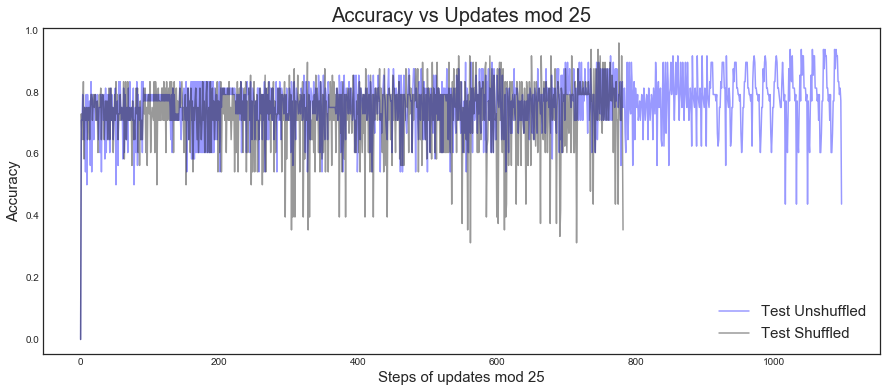

In [138]:
fig = plt.figure(figsize=(15,6))
plt.plot(accuracyUpdatesT[::25], alpha = .4, color = 'blue', 
         label = 'Test Unshuffled')
plt.plot(accuracyUpdatesT2[::25], alpha = .4, color = 'black', 
         label = 'Test Shuffled')
plt.xlabel('Steps of updates mod 25', fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.title("Accuracy vs Updates mod 25", fontsize = 20)
plt.legend(loc = 'lower right',fontsize = 15)

As with the training sets, the accuracies of the test sets from the shuffled and unshuffled sets were quite similar up until the shuffled training set reached an accuracy of 1, at which point the algorithm for this data set stopped. 

Interestingly, the accuracy of the test sets seems to "stay higher up" than those of the training sets.For example, note that for the training sets, the accuracy hovers slighly above $0.6$ on average, while the test sets acccuracies hover around $0.7$ and $0.8$.

## Problem 3

### Import statements and obtaining the data

In [34]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import time
np.random.seed(10)
random.seed(10)
covDf = pd.read_csv("covtype.data", sep = ',', header= None)
data = np.array(covDf)

#### Again, please ignore this error message above. Nest, here are some funtions I'll use

In [35]:
#This function splits the indicies of the data into 10 random chunks
def getKFoldIndicies(data, k):
    INDEX = list(range(len(data)))  #Obtaining all the indicies
    random.shuffle(INDEX)           #Shuffling the indicies
    FOLDS = [[] for i in range(10)] #Creating the indicies for folds
    i = 0
    while i < len(INDEX):
        fold = np.mod(i,10)
        FOLDS[fold].append(INDEX[i])
        i+=1
    print("Obtained", k, 'folds of the data.')
    return(FOLDS)

#This calculates the accuracy of a set of predictions
def calcAccuracy(prediction, truth, talk = True):
    accuracy = np.mean(((prediction == truth).tolist()))
    if talk:
        print("Accuracy is: ", accuracy)
    return(accuracy)


#This function's name says it all.
def timeChange(start,end):
    change = end-start
    if change >60:
        print("Run took ", change/60, " minutes.")
    else:
        print("Run took ", change, " seconds.")

#If I have 10 folds of data, this function squishes the other 9
#  not being used for testing into a single vector.
def getTrainIndicies(FOLDS, test_index):
    train = []
    for f in range(len(FOLDS)):
        if not f ==  test_index:
            train.extend(FOLDS[f])
    return(train)

### A Note to the Grader:
#### FOr this problem, I will be using the functions above and the scikit-learn package in order to run the logistic regression. Throughout this problem, I reference the value "C", which represents the inverse of the regularization constant. For example, when C is very large, the constant in front of the regularization term is essentially zero.

## 3a)

#### Here, I'll shuffle indicies of the dataset and divide them into 10 sets. These will be my 10 folds of the data. Next, run a logistic regression using scikit-learn and set multi_class to "multinomial" to handle multiple classes, using 'lbfgs' optimizer (reference https://en.wikipedia.org/wiki/Limited-memory_BFGS for what exactly lbfgs is). I'll also set the regularization constant C = $10^{10}$ in order to make it sufficiently small as to not regularize the weights. I would set it to something like $10^{1000}$, however when this is inverted it slows down the backend of scikit-learn considerably due to floating point arithmetic problems. Please note that there are 7 different kinds of categorical labels I am attemping to predict.

In [36]:
FOLDS = getKFoldIndicies(data,10)

#Truth is the correct labels of testing data
#SoftPred is the predition probability distribution for 1,...,7
Truth_SoftPred = {fold:[] for fold in range(10)}
for test_index in range(len(FOLDS)):
    print('Using fold', test_index, "to test.")
    testDf  = covDf.iloc[FOLDS[test_index],:]
    trainDf = covDf.iloc[getTrainIndicies(FOLDS, test_index),:]

    lr = LogisticRegression(multi_class = 'multinomial', 
                            solver = "lbfgs", C = 10**10)

    start = time.time()
    lr.fit(trainDf.iloc[:,:-1], trainDf.iloc[:,-1])
    end = time.time()
    timeChange(start,end)

    hard_prediction = lr.predict(testDf.iloc[:,:-1])
    calcAccuracy(hard_prediction, testDf.iloc[:,-1])
    #Keeping track of what the true labels are
    Truth_SoftPred[test_index].append(testDf.iloc[:,-1]) 
    #keeping track of the pred prob dists are
    Truth_SoftPred[test_index].append(lr.predict_proba(testDf.iloc[:,:-1])) 
    print("_________")
print('done')   

Obtained 10 folds of the data.
Using fold 0 to test.
Run took  35.91314506530762  seconds.
Accuracy is:  0.6214243915872087
_________
Using fold 1 to test.
Run took  35.56601428985596  seconds.
Accuracy is:  0.6195139582114213
_________
Using fold 2 to test.
Run took  34.93532705307007  seconds.
Accuracy is:  0.6224161374158792
_________
Using fold 3 to test.
Run took  36.577964782714844  seconds.
Accuracy is:  0.6215555670298274
_________
Using fold 4 to test.
Run took  35.231257915496826  seconds.
Accuracy is:  0.6186812619404141
_________
Using fold 5 to test.
Run took  34.968339920043945  seconds.
Accuracy is:  0.6210564362059173
_________
Using fold 6 to test.
Run took  33.181050062179565  seconds.
Accuracy is:  0.6154627286965801
_________
Using fold 7 to test.
Run took  32.394522190093994  seconds.
Accuracy is:  0.618182131116504
_________
Using fold 8 to test.
Run took  31.30987286567688  seconds.
Accuracy is:  0.6170633896146366
_________
Using fold 9 to test.
Run took  34.943

#### In order to obtain a single ROC curve for each fold of the data, I will take the micro-average of the 7 ROC cruves for each fold of the data, and then plot these 10 micro-averages on the same plot. This micro-average method first binaryizes the predicted values (i.e. a prediction of '4' becomes [0,0,0,1,0,0,0]), which is then fed into the roc_curve function of scikit-learn peicewise with the values of soft_pred.  

Fold 0 produced a micro-average AUC of 0.9222827373332166
Fold 1 produced a micro-average AUC of 0.9211872691831184
Fold 2 produced a micro-average AUC of 0.923398364745913
Fold 3 produced a micro-average AUC of 0.9208199419172425
Fold 4 produced a micro-average AUC of 0.9219802940706564
Fold 5 produced a micro-average AUC of 0.9220828508182676
Fold 6 produced a micro-average AUC of 0.9206260295180457
Fold 7 produced a micro-average AUC of 0.9198267195308001
Fold 8 produced a micro-average AUC of 0.9202515578958235
Fold 9 produced a micro-average AUC of 0.9200541491625157


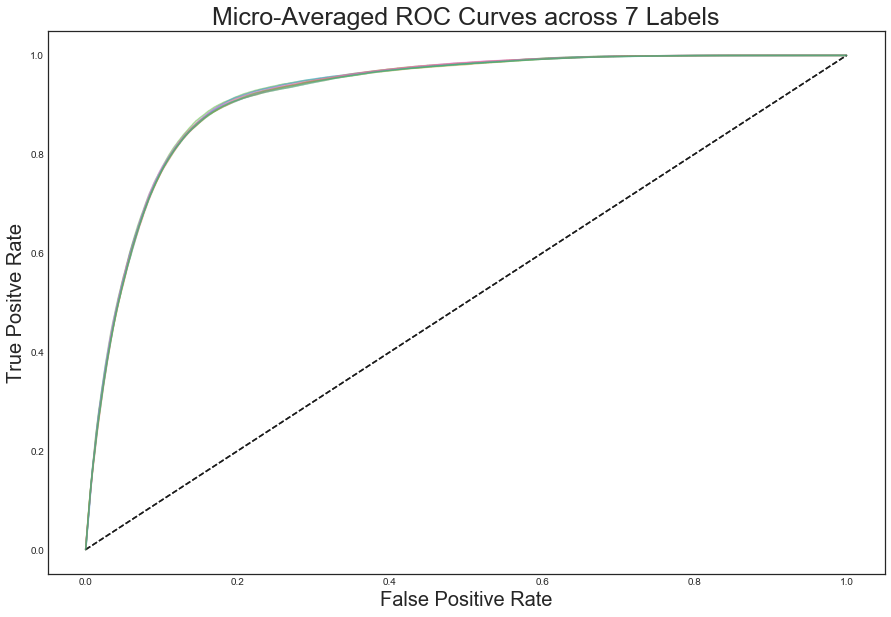

In [90]:
fig = plt.figure(figsize=(15,10))
sns.set_palette("husl")
for foldNumber in range(10):  
    truth = Truth_SoftPred[foldNumber][0]
    soft_pred = Truth_SoftPred[foldNumber][1]
    truthBinary = label_binarize(truth - 1, classes=list(range(7)))
    # Compute micro-average ROC curve and ROC area
    # Note: some code taken from sklearn's website tutorial on roc_curve
    fpr, tpr, thresh = roc_curve(truthBinary.ravel(),soft_pred.ravel())
    auc = sk.metrics.auc(fpr, tpr)
    print("Fold",foldNumber,"produced a micro-average AUC of",auc)
    plt.plot(fpr,tpr, alpha = .5)
    plt.plot([0,1], [0,1], "--", color = 'black', alpha = 0.2)
    plt.xlabel('False Positive Rate', fontsize = 20)
    plt.ylabel('True Positve Rate', fontsize = 20)
    plt.title('Micro-Averaged ROC Curves across 7 Labels',fontsize = 25)

#### Unsurprisingly, all of the ROC curves for each of the ten training folds overlap considerably. In fact, it is quite difficult to distinguish between the lines, but hopefully the grader is able to see the various colors around the coordinate $[0.2, 0.9]$

## 3b)

#### Here, I'll use the last of my ten folds as the test fold, and the remining 9 will alternate between being a training set and a validation set. Below you will find the values of "K" I have chosen to test the algorithm over. These values are spaced out by values of 100.

In [38]:
K = np.linspace(-5,6,12)*2
K = [float(k) for k in 10**K]
print("K[:6]=",K[:6], "\n K[6:]=", K[6:])

K[:6]= [1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1.0] 
 K[6:]= [100.0, 10000.0, 1000000.0, 100000000.0, 10000000000.0, 1000000000000.0]


#### Below, 'accuracy' is interpreted as the fraction of correct predictions over total predictions. 

In [39]:
#storying the dataframe in an array
data         = np.array(covDf)
#Folding my data into 10 folds
FOLDS        = getKFoldIndicies(data,10)
#Obtaining the indicies to my training data
testIndicies = FOLDS[-1]
testDf       = covDf.iloc[testIndicies,:]
#Removing the training indicies from FOLDS
FOLDS        = FOLDS[:-1]

kAcc = {k:[] for k in K}
for k in K:
    print("k=",k, ", fold: ",end=""),
    for vi in range(len(FOLDS)):
        print(vi, end =" "),
        vDf  = covDf.iloc[FOLDS[vi],:]
        trainDf = covDf.iloc[getTrainIndicies(FOLDS, vi),:]

        lr = LogisticRegression(multi_class = 'multinomial', 
                                solver = "lbfgs", C=1/k)
        #Here, k is inverted since C is the inverse regularization constant
        
        lr.fit(trainDf.iloc[:,:-1], trainDf.iloc[:,-1])

        hard_prediction = lr.predict(vDf.iloc[:,:-1])
        run_acc = calcAccuracy(hard_prediction,
                               vDf.iloc[:,-1], False)
        kAcc[k].append(run_acc)
    print("Mean Accuracy:", np.mean(kAcc[k]))
print('done') 

meanValues = [np.mean(kAcc[k]) for k in kAcc]
print("Best value of K is k =", K[np.argmax(meanValues)])
print("With a mean accuracy =", np.max(meanValues))

Obtained 10 folds of the data.
k= 1e-10 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.619677149028937
k= 1e-08 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6196637624114014
k= 1e-06 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6196656747900371
k= 0.0001 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6196618500327659
k= 0.01 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6197421700671205
k= 1.0 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6200156382700859
k= 100.0 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6201648085433076
k= 10000.0 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6184513259421711
k= 1000000.0 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6180535446360333
k= 100000000.0 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.60599604638023
k= 10000000000.0 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.6156707298415538
k= 1000000000000.0 , fold: 0 1 2 3 4 5 6 7 8 Mean Accuracy: 0.48718233492290364
done
Best value of K is k = 100.0
With a mean accuracy = 0.6201648085433076


#### It appears that very large values of k result in suboptimal mean accuracy values, and that these values don't change very much after $k<10000$. Nevertheless, my CV method predicts that $k=100$ will yield the best results!

## 3c)

In [51]:
trainDf = covDf.iloc[getTrainIndicies(FOLDS, -10), :]
#The -10 above will cause all remaining 9 folds of FOLDS
#  to be flattened into a single vector.
kAcc = {}
#I'll keep track of the k with max accuracy
maxK = -10
maxAcc = -10
#I'll store the AUC values here
kToAuc = {}
#Storing the fpr and tpr for each k
Fpr = {}
Tpr = {}
for k in K:
    print("k =",k, end=""),
    lr = LogisticRegression(multi_class = 'multinomial', 
                            solver = "lbfgs", C=1/k)

    lr.fit(trainDf.iloc[:,:-1], trainDf.iloc[:,-1])
    
    hard_prediction = lr.predict(testDf.iloc[:,:-1])
    run_acc = calcAccuracy(hard_prediction, testDf.iloc[:,-1], False)
    kAcc[k] = run_acc
    if run_acc > maxAcc:
        maxAcc = run_acc
        maxK   = k
    truth       = testDf.iloc[:,-1]
    truthBinary = label_binarize(truth - 1, 
                                 classes=list(range(7)))
    soft_pred   = lr.predict_proba(testDf.iloc[:,:-1])
    fpr, tpr, thresh = roc_curve(truthBinary.ravel(),
                                 soft_pred.ravel())
    Fpr[k] = fpr
    Tpr[k] = tpr
    
    currentAuc  = sk.metrics.auc(fpr, tpr)
    kToAuc[k]   = currentAuc
    print(", Accuracy=",run_acc)
print("Best value of K is k =", maxK)
print("With a mean accuracy =", maxAcc)

k = 1e-10, Accuracy= 0.6266157208998124
k = 1e-08, Accuracy= 0.6266157208998124
k = 1e-06, Accuracy= 0.6266157208998124
k = 0.0001, Accuracy= 0.6265296638612072
k = 0.01, Accuracy= 0.6265985094920914
k = 1.0, Accuracy= 0.6252215968744084
k = 100.0, Accuracy= 0.6266501437152545
k = 10000.0, Accuracy= 0.6247396774582193
k = 1000000.0, Accuracy= 0.6219514294074112
k = 100000000.0, Accuracy= 0.6124163095299564
k = 10000000000.0, Accuracy= 0.5118500542159343
k = 1000000000000.0, Accuracy= 0.49135126762017867
Best value of K is k = 100.0
With a mean accuracy = 0.6266501437152545


#### My predicted value of $k=100$ yielded the best results. This supports the idea that CV can be an effective way of finding optimal $k$ values (at least amoungst a set of k values)

## 3d)

/Users/euresa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Test Accuracy')

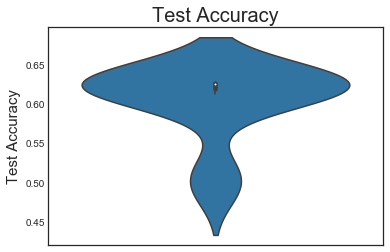

In [83]:
accuracyValues = [kAcc[k] for k in kAcc]
#sns.set(style="whitegrid")
sns.violinplot(accuracyValues, orient='v')
plt.title("Test Accuracy", fontsize = 20)
plt.ylabel("Test Accuracy",fontsize = 15)

#Please ignore the error message below

#### Although the majority of my accuracy values are centered around $0.625$, there does exist a point around $0.48$. Thus, the value of 'k' does seem to have a pretty significant effect on the overall accuracy of my predictions, for if I had chosen k to be very large, I may have resulted in a poor accuracy. 

/Users/euresa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'AUC')

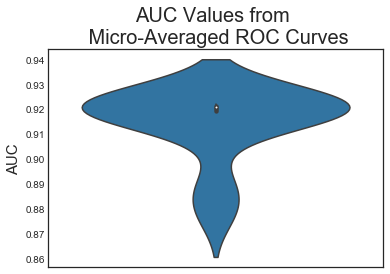

In [84]:
aucValues = [kToAuc[k] for k in kToAuc]
sns.violinplot(aucValues, orient = 'v')
plt.title("AUC Values from \n Micro-Averaged ROC Curves", fontsize = 20)
plt.ylabel("AUC",fontsize = 15)

#Please ignore the error message below

####  As with accuracy, the AUC values seem to cluster around a short range: here, that range is $[0.915, 0.925]$. There does however exist a point around $0.88$, and thus the value of k does have an influence on the overall AUC value. It does seem however that if the value of k is between $10^{-10}$ and $10^6$, the accuracy and the AUC do not change very much.

## 3e)

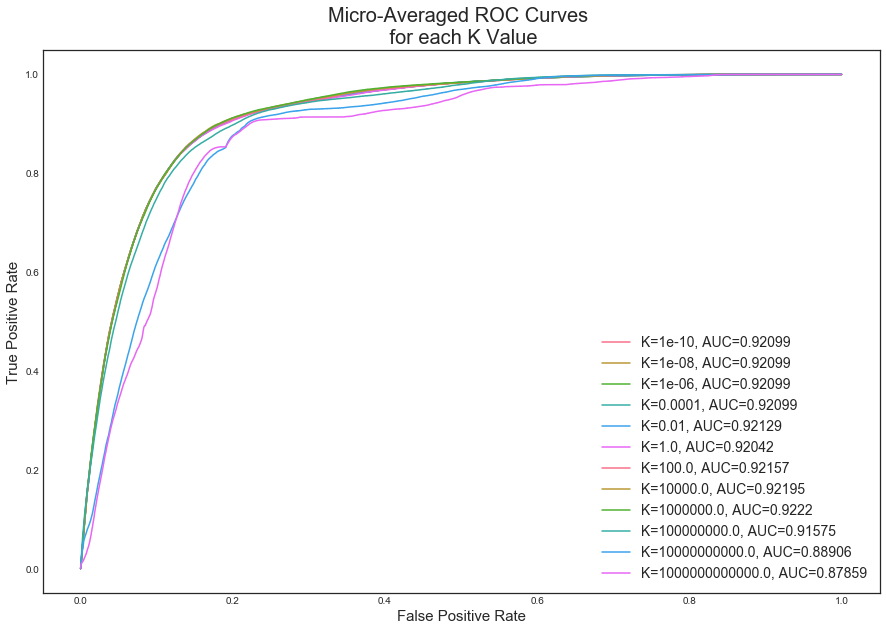

In [143]:
fig = plt.figure(figsize=(15,10))
i=0
sns.set_palette("husl")
for k in Fpr:
    plt.plot(Fpr[k], Tpr[k], label = "K="+str(k)+
             ", AUC="+str(np.round(aucValues[i],5)))
    i = i + 1
    
plt.title("Micro-Averaged ROC Curves \n for each K Value",
         fontsize = 20)
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.legend(fontsize = 14)
plt.show()

#### Remarks: Given these results, I would be strongly consider tuning and testing hyperparameters such as K before implementing an algorithm in the future since my overall ROC curves seem to very from one another in nontrival ways.  